# BÀI TẬP THỰC HÀNH PANDAS VÀ MATPLOTLIB

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

### Câu 1. Vẽ biểu đồ histogram biểu diễn sự phân bố mức lương theo USD (salary_in_usd).

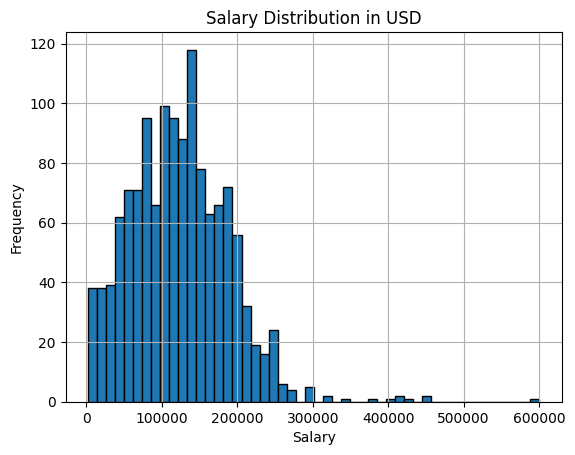

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('salaries.csv')

# Assuming df is your DataFrame and it has a column 'salary_in_usd'
df['salary_in_usd'].hist(bins=50, edgecolor='black')

plt.title('Salary Distribution in USD')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

### Câu 2. Vẽ biểu đồ histogram biểu diễn sự phân bố mức lương theo VND (salary_in_vnd)

In [4]:
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame and it has a column 'salary_in_vnd'
# df['salary_in_vnd'].hist(bins=50, edgecolor='black')

# plt.title('Salary Distribution in VND')
# plt.xlabel('Salary')
# plt.ylabel('Frequency')

# plt.show()

### Câu 3. Vẽ biểu đồ histogram biểu diễn sự phân bố mức độ hoàn thành công việc từ xa
(remote_ratio) (tính theo %).


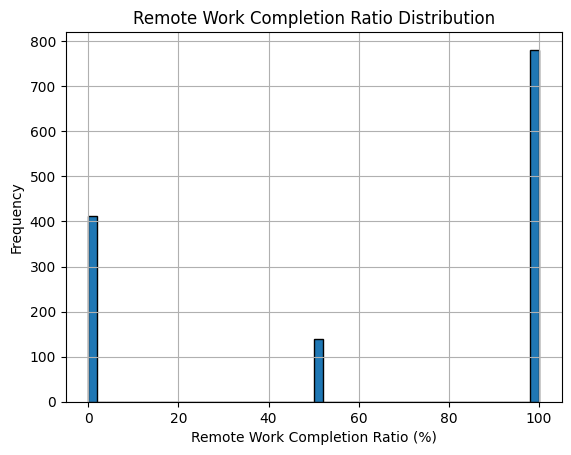

In [5]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has a column 'remote_ratio'
df['remote_ratio'].hist(bins=50, edgecolor='black')

plt.title('Remote Work Completion Ratio Distribution')
plt.xlabel('Remote Work Completion Ratio (%)')
plt.ylabel('Frequency')

plt.show()

### Câu 4. Thêm cột gender (giới tính) và sau đó random cho giá trị 0 và 1, trong đó 0 đại diện
cho nam giới và 1 đại diện cho nữ giới. Vẽ biểu đồ tròn biểu diễn tỉ lệ phân bố giới tính và
cho biết giới tính nào chiểm tỉ lệ cao hơn.


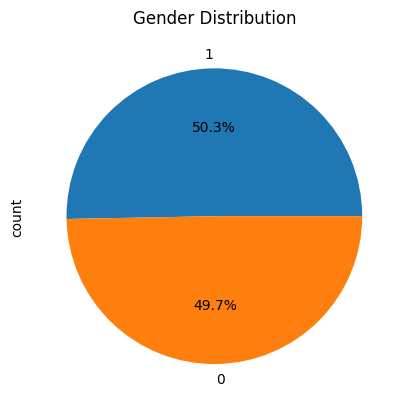

The majority gender is: Female


In [6]:
import numpy as np

# Add a new column 'gender' with random values of 0 and 1
df['gender'] = np.random.choice([0, 1], size=len(df))

# Get the counts of each gender
gender_counts = df['gender'].value_counts()

# Create a pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Gender Distribution')
plt.show()

# Determine which gender has a higher ratio
majority_gender = "Male" if gender_counts[0] > gender_counts[1] else "Female"
print(f"The majority gender is: {majority_gender}")

### Câu 5. Vẽ biểu đồ miền biểu diễn tỉ lệ phân bố giới tính (gender) qua các năm. 

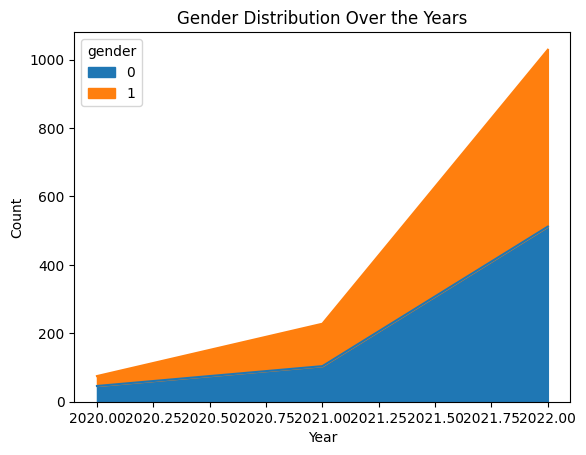

In [7]:
# Group by 'year' and 'gender', count the number of occurrences, unstack to have one column per gender
gender_distribution = df.groupby(['work_year', 'gender']).size().unstack()

# Create an area plot
gender_distribution.plot(kind='area', stacked=True)

plt.title('Gender Distribution Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

### Câu 6. Vẽ biểu đồ phân tán biểu diễn mối quan hệ giữa giới tính (gender) và mức lương theo
VND (salary_in_vnd). Quan sát sự phân bố và xem xét liệu rằng giữa hai đại lượng này có
mối quan hệ tương quan với nhau hay không. Nếu có, hãy cho biết mối quan hệ giữa hai đại
lượng này có phải là mối quan hệ tuyến tính hay không?

In [8]:
!pip install seaborn

In [9]:
# import seaborn as sns

# # Create a scatter plot
# sns.scatterplot(x='gender', y='salary_in_vnd', data=df)

# plt.title('Relationship Between Gender and Salary in VND')
# plt.xlabel('Gender')
# plt.ylabel('Salary in VND')

# plt.show()

# # Calculate the correlation coefficient
# correlation = df['gender'].corr(df['salary_in_vnd'])

# print(f"The correlation between gender and salary in VND is: {correlation}")

# if -0.1 < correlation < 0.1:
#     print("There is no linear relationship between gender and salary in VND.")
# elif correlation > 0:
#     print("There is a positive linear relationship between gender and salary in VND.")
# else:
#     print("There is a negative linear relationship between gender and salary in VND.")

### Câu 7. Vẽ biểu đồ phân tán biểu diễn mối quan hệ giữa ngành nghề (job_title) và mức lương
theo VND (salary_in_vnd). Quan sát sự phân bố và xem xét liệu rằng giữa hai đại lượng này
có mối quan hệ tương quan với nhau hay không. Nếu có, hãy cho biết mối quan hệ giữa hai
đại lượng này có phải là mối quan hệ tuyến tính hay không?

In [10]:
# Câu 7

### Câu 8. Vẽ biểu đồ tròn biểu diễn sự phân bố quy mô công ty (company_size).


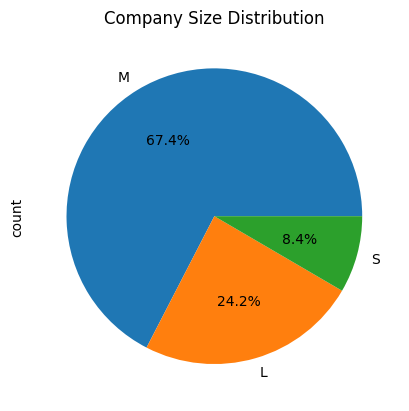

In [11]:
# Get the counts of each company size
company_size_counts = df['company_size'].value_counts()

# Create a pie chart
company_size_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Company Size Distribution')
plt.show()

### Câu 9. Vẽ biểu đồ cột biểu diễn sự phân bố hình thức làm việc (employment_type).

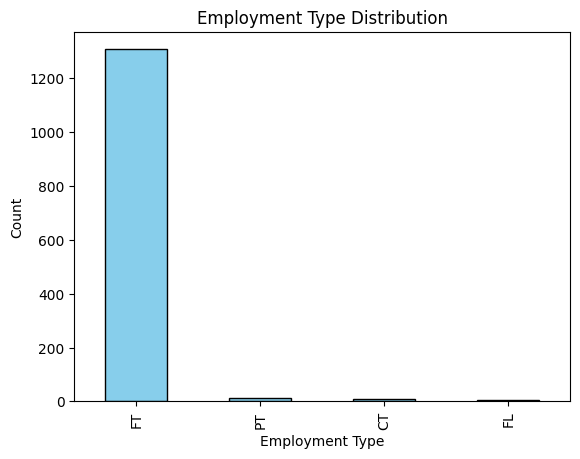

In [12]:
# Get the counts of each employment type
employment_type_counts = df['employment_type'].value_counts()

# Create a bar chart
employment_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')

plt.show()

### Câu 10. Vẽ biểu đồ cột biểu diễn số lượng nhân sự của các ngành nghề (job_title) có liên
quan đến lĩnh vực Khoa học và Kỹ thuật dữ liệu (trong tên ngành nghề có từ “Data”).


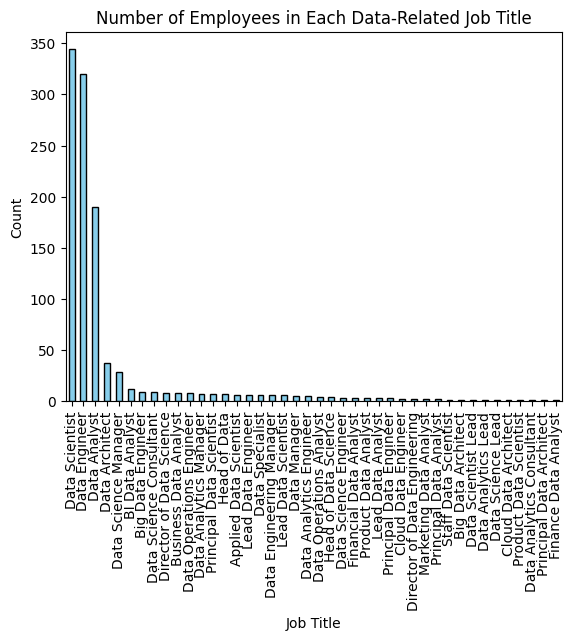

In [13]:
import pandas as pd

# Load the data
df = pd.read_csv('salaries.csv')

# Filter the DataFrame to only include rows where the job_title contains the word "Data"
data_jobs = df[df['job_title'].str.contains('Data')]

# Get the counts of each job title
job_title_counts = data_jobs['job_title'].value_counts()

# Create a bar chart
job_title_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Employees in Each Data-Related Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')

plt.show()

### Câu 11. Tính trung bình mức lương theo USD (salary_in_usd) của tất cả những người được
khảo sát theo từng năm. Vẽ biểu đồ đường biểu diễn sự thay đổi trung bình mức lương theo
USD (salary_in_usd), từ đó đưa ra dự đoán về xu hướng thay đổi mức lương theo USD
(salary_in_usd) trong tương lai.

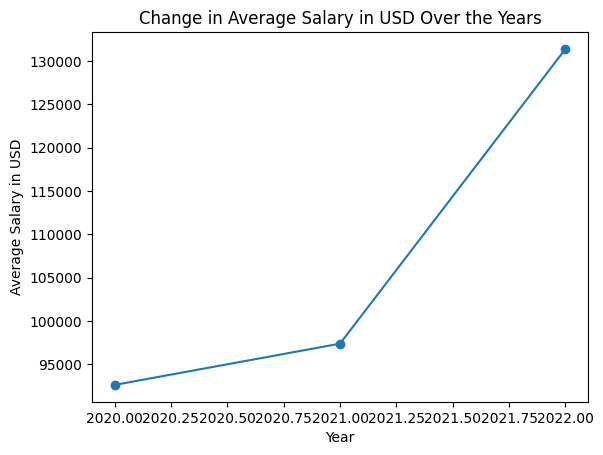

In [14]:
# Group by 'year' and calculate the mean of 'salary_in_usd'
average_salary = df.groupby('work_year')['salary_in_usd'].mean()

# Create a line plot
average_salary.plot(kind='line', marker='o')

plt.title('Change in Average Salary in USD Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')

plt.show()

### Câu 12. Tính trung bình tỉ lệ hoàn thành công việc từ xa (remote_ratio) (tính theo %) của tất cả những người được khảo sát theo từng năm. Vẽ biểu đồ đường biểu diễn sự thay đổi tỉ lệ hoàn thành công việc từ xa (remote_ratio), từ đó đưa ra dự đoán về xu hướng thay đổi tỉ lệ hoàn thành công việc từ xa (remote_ratio) trong tương lai. 

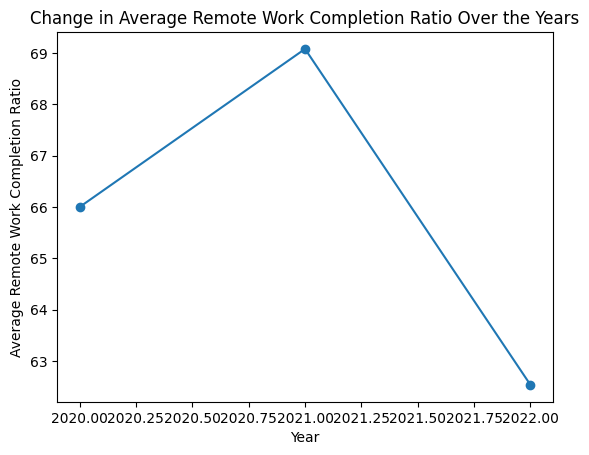

In [15]:
# Group by 'year' and calculate the mean of 'remote_ratio'
average_remote_ratio = df.groupby('work_year')['remote_ratio'].mean()

# Create a line plot
average_remote_ratio.plot(kind='line', marker='o')

plt.title('Change in Average Remote Work Completion Ratio Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Remote Work Completion Ratio')

plt.show()

### Câu 13. Tính trung bình mức lương theo USD (salary_in_usd) của 500 người đầu tiên trong
bộ dữ liệu, sau đó thống kê số lượng nhân sự trong số 500 người này theo hai nhóm sau:
-   “Muc luong thap”: Những người có mức lương thấp hơn mức trung bình.
-   “Muc luong cao”: Những người có mức lương từ mức trung bình trở lên.
Vẽ biểu đồ tròn biểu diễn sự phân bố mức lương và rút ra nhận xét.


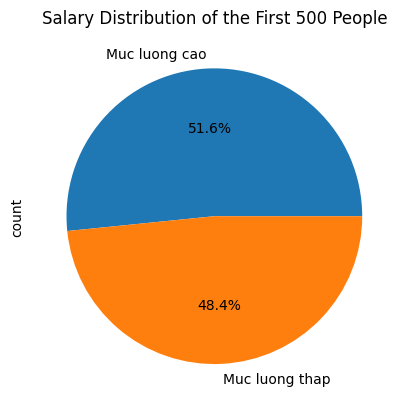

In [16]:
# Calculate the average salary of the first 500 people
average_salary = df.loc[:499, 'salary_in_usd'].mean()

# Categorize each person as having a low or high salary
df.loc[:499, 'salary_category'] = df.loc[:499, 'salary_in_usd'].apply(lambda x: 'Muc luong thap' if x < average_salary else 'Muc luong cao')

# Get the counts of each salary category
salary_category_counts = df.loc[:499, 'salary_category'].value_counts()

# Create a pie chart
salary_category_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Salary Distribution of the First 500 People')
plt.show()

### Câu 14. Thống kê tỉ lệ hoàn thành công việc từ xa (remote_ratio) (tính theo %) của 500 người
đầu tiên trong bộ dữ liệu theo hai nhóm sau:
-   “Lam viec tu xa khong hieu qua”: Những người có tỉ lệ hoàn thành công việc từ xa
nhỏ hơn 50%.
-   “Lam viec tu xa hieu qua”: Những người có tỉ lệ hoàn thành công việc từ xa từ 50%
trở lên.
Vẽ biểu đồ tròn biểu diễn sự phân bố tỉ lệ hoàn thành công việc từ xa và rút ra nhận xét.

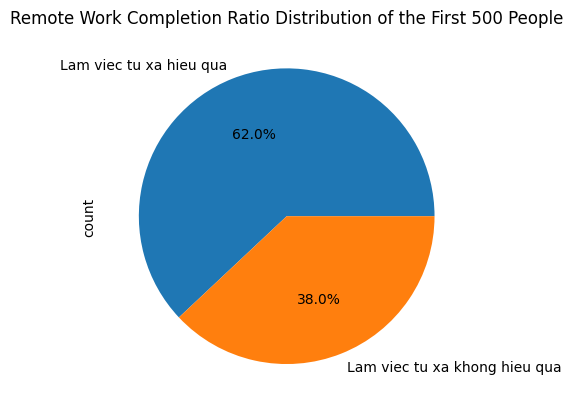

In [17]:
# Categorize each person as having an effective or ineffective remote work completion ratio
df.loc[:499, 'remote_work_category'] = df.loc[:499, 'remote_ratio'].apply(lambda x: 'Lam viec tu xa khong hieu qua' if x < 50 else 'Lam viec tu xa hieu qua')

# Get the counts of each remote work category
remote_work_category_counts = df.loc[:499, 'remote_work_category'].value_counts()

# Create a pie chart
remote_work_category_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Remote Work Completion Ratio Distribution of the First 500 People')
plt.show()

### Câu 15. Vẽ biểu đồ cột biểu diễn số lượng công ty đặt tại mỗi quốc gia (company_location).


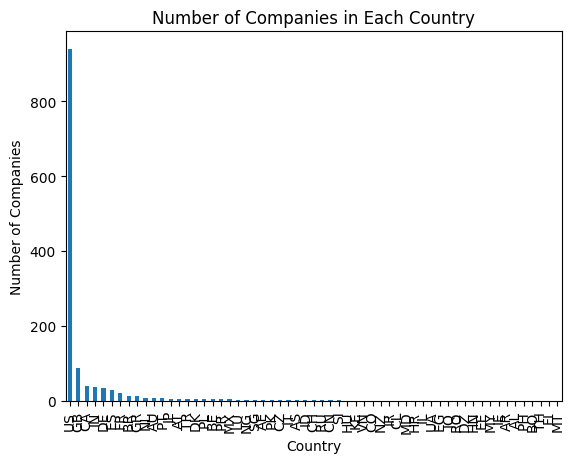

In [18]:
# Count the number of companies in each location
company_location_counts = df['company_location'].value_counts()

# Create a bar plot
company_location_counts.plot(kind='bar')

plt.title('Number of Companies in Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Companies')

plt.show()